In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from scipy.io import wavfile 

%matplotlib inline

In [242]:
window = 10e-3
fs, data = wavfile.read('recording.wav')
data = data.astype(np.float32) / (1 << 15)
data_pad = np.pad(data, [frame_size, frame_size])
frame_size = int(fs * window)
num_frames = data.shape[0] // frame_size

In [230]:
order = 12
i, j = np.meshgrid(np.arange(order), np.arange(order))
YW_idx = np.abs(i - j)
data_left = np.pad(data, [order, 0])

In [339]:
frame_idx = 1896
win_data = data[frame_idx*frame_size: (frame_idx+1)*frame_size]
win_data_pad = np.pad(win_data, [0, order])
win_corr = np.correlate(win_data_pad, win_data, 'valid')
alpha = np.linalg.solve(win_corr[YW_idx], win_corr[1:])
win_data_left = data_left[frame_idx*frame_size: (frame_idx+1)*frame_size + order - 1]
win_data_pred = np.convolve(win_data_left, alpha, 'valid')
e = win_data - win_data_pred

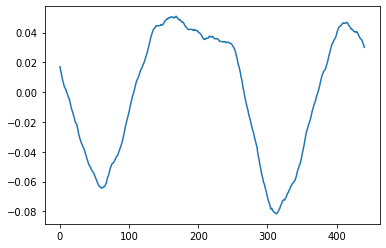

In [340]:
plt.plot(win_data)

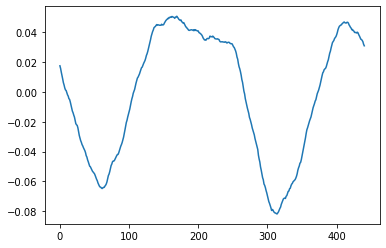

In [341]:
plt.plot(win_data_pred)

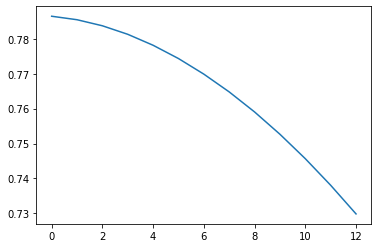

In [342]:
plt.plot(win_corr)

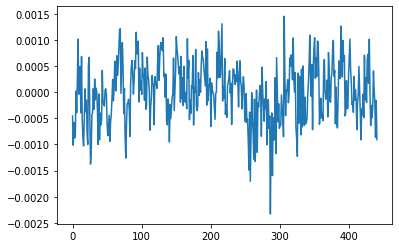

In [343]:
plt.plot(e)

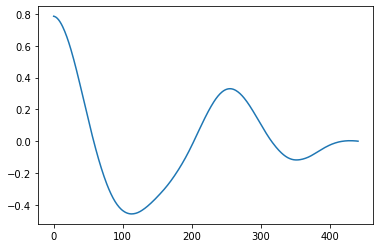

In [344]:
win_data_full = np.pad(win_data, [0, win_data.shape[0]])
corr_full = np.correlate(win_data_full, win_data, 'valid')
corr_0 = corr_full[0]
plt.plot(corr_full)

In [323]:
corr_full[:fs // 250] = 0
pitch_idx = np.argmax(corr_full)

In [325]:
win_corr_full[pitch_idx] / corr_0

0.31186745

In [326]:
corr_0

0.44098046